<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Forecasting of deaths from Heart Failure on medical measurement

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Be confident about your data analysis skills


<p>
You can find the "Heart Disease Dataset UCI" from the following link: <br><a href="https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci" target="_blank">https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci</a>. <br><br>
The statistical data obtained from <a href=\"https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci" target=\"_blank\">https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci</a> under <a href=\"https://creativecommons.org/publicdomain/zero/1.0/\" target=\"_black\">CC0: Public Domain</a> license. <br><br>
We will use this dataset in this lab. It contains medical information about patients, who may suffer from heart disease. Comparing it to our previous dataset, this one has similar columns, except target column, which refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.
</p>

You will need the following libraries:


In [1]:
!pip install dython
!conda install --yes -c conda-forge imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import *

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
If error appeared please restart the kernel or run this block again
</div>

<b>Importing the Data</b>


you will need to download the dataset; if you are running locally, please comment out the following 


In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0N40EN/heart_disease.csv'

Load the csv:


In [4]:
df= pd.read_csv(path)

Set number of digits in float type:

In [5]:
pd.options.display.float_format = '{:.2f}'.format

We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [6]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.00,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.10,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.60,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.00,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.90,Flat,Three,Fixed Defect,0


<details>
<summary><b>Click to see attribute information</b></summary>

Input features (column names):

1. `age` - patient's age in years
2. `sex` - patient's sex ('Male', 'Female')
3. `chest_pain_type` - chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic')
4. `resting_blood_pressure` - resting blood pressure
5. `cholestoral` - serum cholestoral in mg/dl
6. `fasting_blood_sugar` - fasting blood sugar > 120 mg/dl
7. `rest_ecg` - resting electrocardiographic results ('normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy')
8. `Max_heart_rate` - maximum heart rate achieved
9. `exercise_induced_angina` - exercise induced angina ('Yes', 'No')
10. `oldpeak` - ST depression induced by exercise relative to rest
11. `slope` - the slope of the peak exercise ST segment ('Upsloping', 'Downsloping', 'Flat')
12. `vessels_colored_by_flourosopy` - number of major vessels colored by fluoroscopy
13. `thalassemia` - normal; fixed defect; reversible defect

Output feature (desired target):

14. `target` - does the patient have heart disease? (binary)
</details>

<b>Question 1</b>:  Display the data types of each column using the attribute `dtype`.


In [7]:
df.dtypes

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

<b>Question 2</b>: Check if this DataSet contains NaN values:


In [8]:
df.isnull().values.any()

False

<b>Question 3:</b> Check the correlation (numerical values) and association (objects) of each pair of columns.


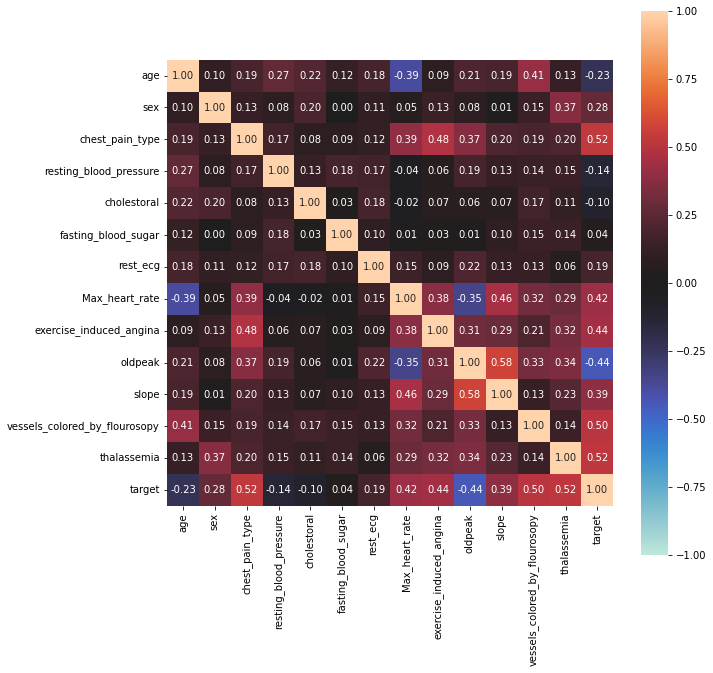

{'corr':                                 age  sex  chest_pain_type  \
 age                            1.00 0.10             0.19   
 sex                            0.10 1.00             0.13   
 chest_pain_type                0.19 0.13             1.00   
 resting_blood_pressure         0.27 0.08             0.17   
 cholestoral                    0.22 0.20             0.08   
 fasting_blood_sugar            0.12 0.00             0.09   
 rest_ecg                       0.18 0.11             0.12   
 Max_heart_rate                -0.39 0.05             0.39   
 exercise_induced_angina        0.09 0.13             0.48   
 oldpeak                        0.21 0.08             0.37   
 slope                          0.19 0.01             0.20   
 vessels_colored_by_flourosopy  0.41 0.15             0.19   
 thalassemia                    0.13 0.37             0.20   
 target                        -0.23 0.28             0.52   
 
                                resting_blood_pressure  chol

In [9]:
associations(df, figsize=(10,10))

<b>Question 4:</b> Divide the dataset into input and target factors.


In [10]:
x = df.drop(columns=['target'])
y = df['target']
x

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.00,Downsloping,Two,Reversable Defect
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.10,Upsloping,Zero,Reversable Defect
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.60,Upsloping,Zero,Reversable Defect
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.00,Downsloping,One,Reversable Defect
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.90,Flat,Three,Fixed Defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.00,Downsloping,Zero,Fixed Defect
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.80,Flat,One,Reversable Defect
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.00,Flat,One,Fixed Defect
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.00,Downsloping,Zero,Fixed Defect


<b>Question 5</b>: Create column transformer using `OrdinalEncoder()` and `StandardScaler()` and visualize it.


In [11]:
col_cat = list(x.select_dtypes(include=['object']).columns)
col_num = list(x.select_dtypes(include=['float', 'int', 'bool']).columns)
trans = make_column_transformer((OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), col_cat),
                                (StandardScaler(), col_num),
                                remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['sex', 'chest_pain_type',
                                  'fasting_blood_sugar', 'rest_ecg',
                                  'exercise_induced_angina', 'slope',
                                  'vessels_colored_by_flourosopy',
                                  'thalassemia']),
                                ('standardscaler', StandardScaler(),
                                 ['age', 'resting_blood_pressure',
                                  'cholestoral', 'Max_heart_rate',
                                  'oldpeak'])])

<b> Question 6:</b> Separate DataSets for train and test DataSets in 0.3 proportion train/test.


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, shuffle=False)

<b>Question 7: </b> Create Pipeline using `LogisticRegression()` model and show its accuracy and recall score.


In [13]:
lr = LogisticRegression()
pipe_lr = make_pipeline(trans ,lr)
pipe_lr.fit(x_train,y_train)

scores_train = pipe_lr.score(x_train, y_train)
scores_test = pipe_lr.score(x_test, y_test)
print('Training DataSet accuracy: {: .1%}'.format(scores_train), 'Test DataSet accuracy: {: .1%}'.format(scores_test))

scores_train = recall_score(y_train, pipe_lr.predict(x_train))
scores_test = recall_score(y_test, pipe_lr.predict(x_test))
print('Recall Training DataSet accuracy: {: .1%}'.format(scores_train), 'Recall Test DataSet accuracy: {: .1%}'.format(scores_test))

Training DataSet accuracy:  86.1% Test DataSet accuracy:  79.2%
Recall Training DataSet accuracy:  88.4% Recall Test DataSet accuracy:  80.5%


<b>Question 8 :</b> Calculate Cross-Validation Score using 4 folds, calculate the average and standard deviation of estimate and predict the output.

In [14]:
Rcross = cross_val_score(pipe_lr, x, y, cv=4)
print(np.around(Rcross, decimals=2))
print("The mean of the folds are", round(Rcross.mean(), 2), "and the standard deviation is" , round(Rcross.std(), 2))

yhat = cross_val_predict(pipe_lr, x, y,cv=4)
yhat[0:5]

[0.87 0.84 0.84 0.79]
The mean of the folds are 0.83 and the standard deviation is 0.03


array([0, 0, 0, 0, 0], dtype=int64)

<b>Question 9 :</b> Plot the confusion matrix to evaluate the correctness of the classification.


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


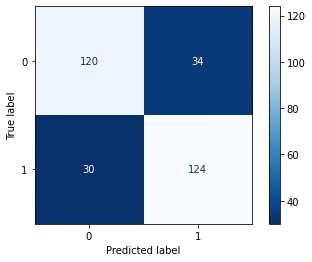

In [15]:
plot_confusion_matrix(pipe_lr, x_test, y_test, cmap=plt.cm.Blues_r)
plt.show()

<b>Question 10</b>: Check whether the number of values of target column is similar, use `RandomOverSampler()` if it's not.


<AxesSubplot: xlabel='target', ylabel='count'>

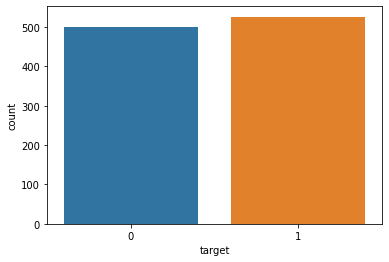

In [16]:
sns.countplot(x = y)

<b>Question 11</b>: Test different classifiers including `VotingClassifier()` and calculate their accuracy.


In [17]:
names = ["Logistic Regression", "Linear SVM",
         "Decision Tree", "Extra Tree", "Random Forest", "Neural Net",
         "AdaBoost", "GradientBoostingClassifier", "BaggingClassifier", "VotingClassifier"]

classifiers = [
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)]

est = [(str(est), est) for est in classifiers]

eclf = [VotingClassifier(
     estimators=est,
     voting='hard')]
classifiers += eclf
scores_train = []
scores_test = []

for name, classif in zip(names, classifiers):
    print(name,'fitting.....')
    clf = make_pipeline(trans, classif)
    clf.fit(x_train,y_train)
    score_train = recall_score(y_train, clf.predict(x_train))
    score_test = recall_score(y_test, clf.predict(x_test))
    scores_train.append(score_train)
    scores_test.append(score_test)


Logistic Regression fitting.....
Linear SVM fitting.....
Decision Tree fitting.....
Extra Tree fitting.....
Random Forest fitting.....
Neural Net fitting.....
AdaBoost fitting.....
GradientBoostingClassifier fitting.....
BaggingClassifier fitting.....
VotingClassifier fitting.....


<b>Question 12</b>: Compare the accuracy of classifiers and build a plot to visualize it.


                            Train  Test
Classifier accuracy                    
Logistic Regression          0.88  0.81
Linear SVM                   0.90  0.81
Decision Tree                0.97  0.92
Extra Tree                   0.78  0.68
Random Forest                0.94  0.85
Neural Net                   0.96  0.90
AdaBoost                     0.96  0.92
GradientBoostingClassifier   0.98  0.92
BaggingClassifier            0.92  0.86
VotingClassifier             0.96  0.90


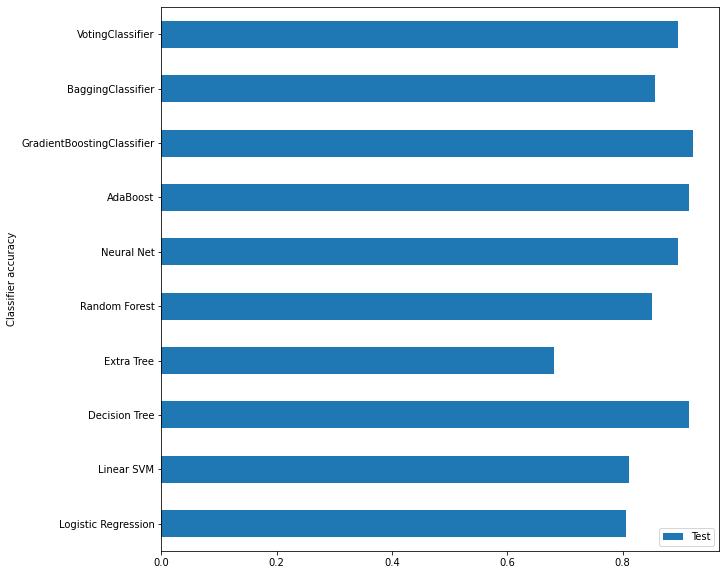

In [18]:
res = pd.DataFrame(index = names)
res['Train'] = np.array(scores_train)
res['Test'] = np.array(scores_test)

res.index.name = "Classifier accuracy"
print(res)

res[['Test']].plot(kind="barh", figsize=(10,10))
plt.show()

<b>Question 13</b>: Create a Pipeline based on Decision Tree, calculate and visualize its accuracy. Use `max_depth = 3` in order to see the vertices clearly.

Training DataSet accuracy:  85.9% Test DataSet accuracy:  82.5%


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


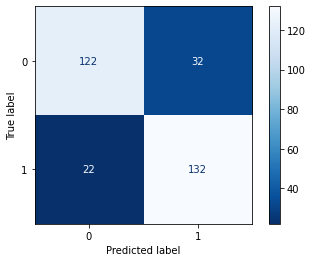

In [19]:
dtr = DecisionTreeClassifier(max_depth=3)
pipe_s_dtr = make_pipeline(trans, dtr)
pipe_s_dtr.fit(x_train, y_train)
scores_train = pipe_s_dtr.score(x_train, y_train)
scores_test = pipe_s_dtr.score(x_test, y_test)
print('Training DataSet accuracy: {: .1%}'.format(scores_train), 'Test DataSet accuracy: {: .1%}'.format(scores_test))
plot_confusion_matrix(pipe_s_dtr, x_test, y_test, cmap=plt.cm.Blues_r)
plt.show()

<b>Question 14</b>: Visualize the Decision Tree using `plot_tree` function.

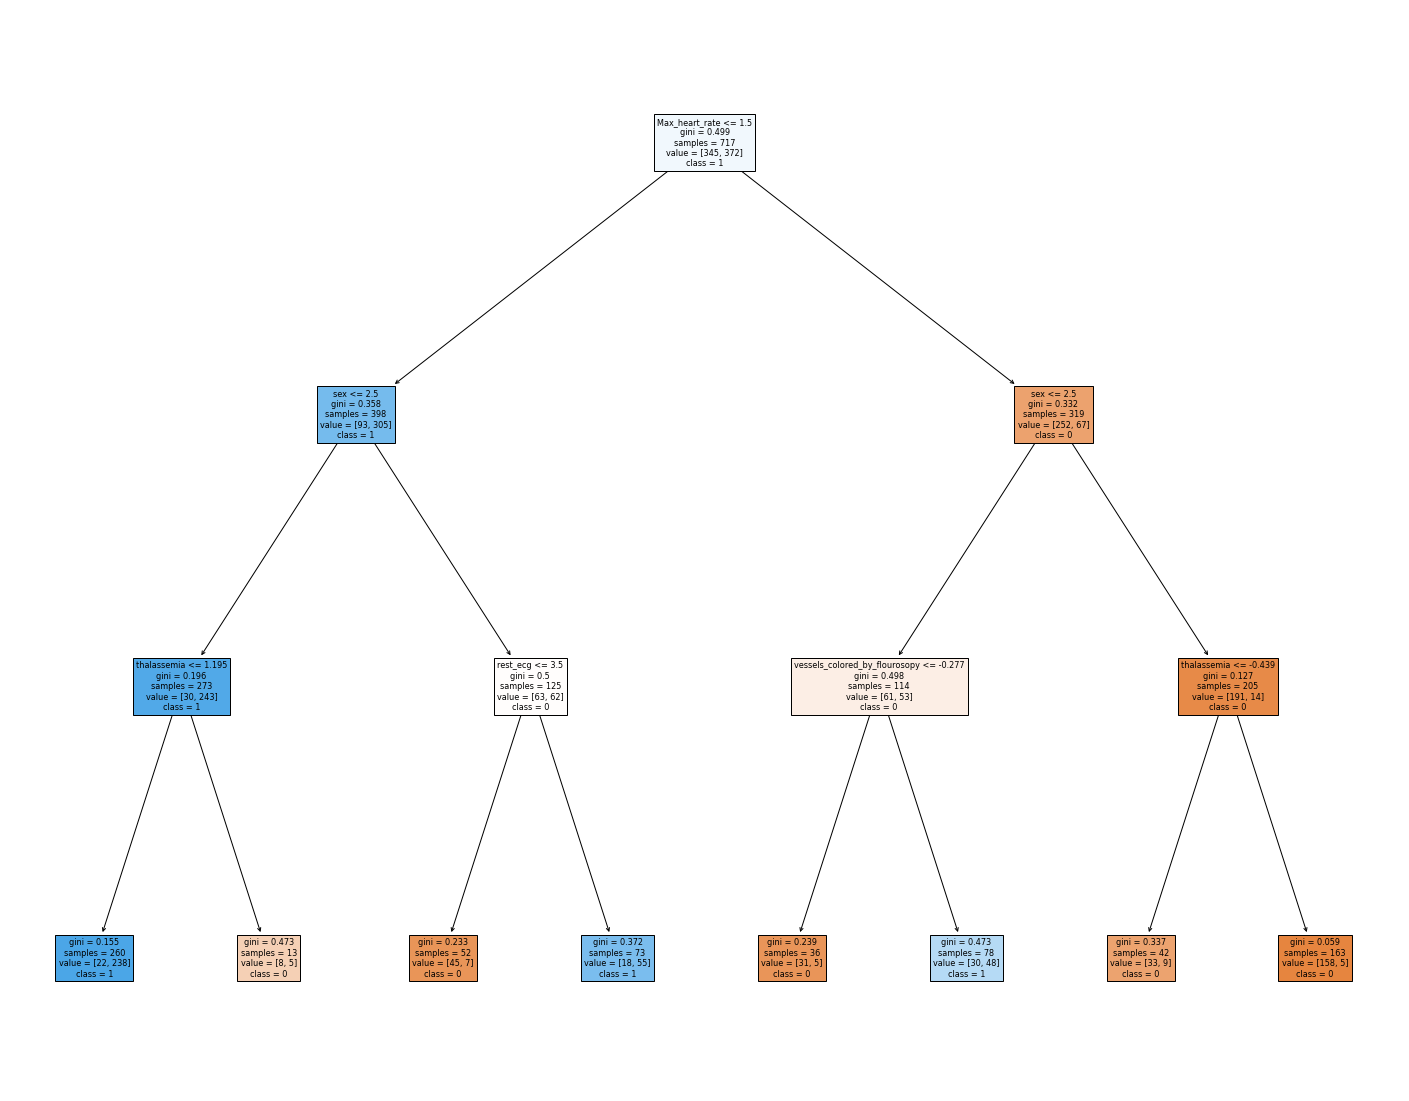

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(pipe_s_dtr['decisiontreeclassifier'],
               feature_names = x_train.columns,
               class_names = y_train.unique().astype('str'),
               filled = True)

<b>Question 15</b>: Write `create_ensemble()` function, that can create ensemble using a predetermined number of classifiers. Make a pipeline with it, fit it and calculate its accuracy.

In [21]:
def create_ensemble(models, x_train, y_train, x_test, y_test, trans):
    est = [(str(est), est) for est in models]
    voting = VotingClassifier(
         estimators=est,
         voting='hard')
    clf = make_pipeline(trans, voting)
    clf.fit(x_train, y_train)
    score_train = recall_score(y_train, clf.predict(x_train))
    score_test = recall_score(y_test, clf.predict(x_test))
    print('Train accuracy of ensemble: ', round(score_train, 2))
    print('Test accuracy of ensemble: ', round(score_test, 2))
    return clf

<b>Question 16</b>: Write `make_prediction()` function, that returns an answer to whether the patient has heart disease. Input should contain a DataFrame and a classifier.


In [22]:
def make_prediction(classifier, data):
    res = pd.DataFrame(classifier.predict(data), columns=['Heart disease'])
    res['Heart disease'] = res['Heart disease'].map({0: False, 1: True})
    return res

<b>Question 17</b>: Create a new ensemble of your own list of classifiers using the first function.  

In [23]:
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)]

ensemble = create_ensemble(classifiers, x_train, y_train,  x_test, y_test, trans)

Train accuracy of ensemble:  0.96
Test accuracy of ensemble:  0.89


<b>Question 18</b>: Predict the output with your own data, using the second function and the ensemble you just obtained.

In [24]:
fields = [
    [52, 'Male', 'Typical angina', 125, 212, 'Lower than 120 mg/ml', 'ST-T wave abnormality',
     168, 'No', 1.0, 'Downsloping', 'Two', 'Reversable Defect'],
    [58, 'Female', 'Typical angina', 100, 248, 'Lower than 120 mg/ml', 'Normal',
     122, 'No', 1.0, 'Flat', 'Zero', 'Fixed Defect']]

df1 = pd.DataFrame(data=fields, columns=x.columns)


make_prediction(ensemble, df1)

,Heart disease
0,False
1,True


<b>Sources</b>


<a href="https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci" target="_blank">https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci</a>.

### Thank you for completing this lab!

## Author

<a href="https://author.skills.network/instructors/bohdan_kuno">Bohdan Kuno</a>

### Other Contributors

<a href="https://author.skills.network/instructors/yaroslav_vyklyuk_2">Prof. Yaroslav Vyklyuk, DrSc, PhD</a>

<a href="https://author.skills.network/instructors/nataliya_boyko">Ass. Prof. Nataliya Boyko, PhD</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                         |
| ----------------- | ------- | ---------- | ---------------------------------------------------------- |
|2023-04-01|01|Bohdan Kuno|Lab created|


<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
